# Sparse Hebbian Learning: basics

In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
%run setup.py --description

 This is a collection of python scripts to test learning strategies to efficiently code natural image patches.  This is here restricted  to the framework of the [SparseNet algorithm from Bruno Olshausen](http://redwood.berkeley.edu/bruno/sparsenet/).


In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

In [62]:
from shl_scripts import SHL
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
DEBUG_DOWNSCALE, verbose = 10, 10


In [63]:
shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, learning_algorithm='omp', verbose=verbose, eta=.1, n_image=10, n_iter=100)
data = shl.get_data(name_database='serre07_distractors')

Extracting data...Hda_obj74.jpg, Mda_urb384.jpg, Fdn_open12.jpg, Mdn_land159.jpg, Mdn_nat1196.jpg, Fdn_open18.jpg, Fdn_natu799.jpg, Mdn_N344039.jpg, Mdn_N344070.jpg, Fda_urb342.jpg, 
Data is of shape : (10000, 100)done in 0.57s.

In [64]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean())
print('average energy of patches = ', data.std(axis=0).mean())
print('std of the average of individual patches = ', data.mean(axis=0).std())

number of patches, size of patches =  (10000, 100)
average of patches =  1.00186525742e-18
average energy of patches =  1.0
std of the average of individual patches =  1.02192092376e-17


Extracting data...Bdn_nat1006.jpg, Bda_art1256.jpg, Hda_obj450.jpg, Fdn_nat283.jpg, Hda_obj90.jpg, Hda_obj73.jpg, Mdn_nat367.jpg, Bdn_nat250.jpg, Bda_room165.jpg, Mda_art1528.jpg, 
Data is of shape : (10000, 100)done in 0.51s.Learning the dictionary... Training on 10000 patches... Iteration   0 /   10 (elapsed time:   0s,  0.0mn)
Norm  1.0 1.0 19
Gain  1.0 1.0 0
Iteration   1 /   10 (elapsed time:   0s,  0.0mn)
Norm  0.988827445459 1.07851671329 1
Gain  0.999997349009 1.00001047055 33
Iteration   2 /   10 (elapsed time:   0s,  0.0mn)
Norm  0.993975600989 1.06318152552 49
Gain  0.999995662082 1.00001757239 33
Iteration   3 /   10 (elapsed time:   1s,  0.0mn)
Norm  0.985988953781 1.05037939829 6
Gain  0.999992641627 1.00002823516 33
Iteration   4 /   10 (elapsed time:   1s,  0.0mn)
Norm  0.992874798442 1.06161423868 73
Gain  0.999990438089 1.00003517794 33
Iteration   5 /   10 (elapsed time:   2s,  0.0mn)
Norm  0.991283404789 1.0360067353 22
Gain 

/Users/lolo/pool/libs/scikit-learn-sparsenet/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


done in 7.07s.


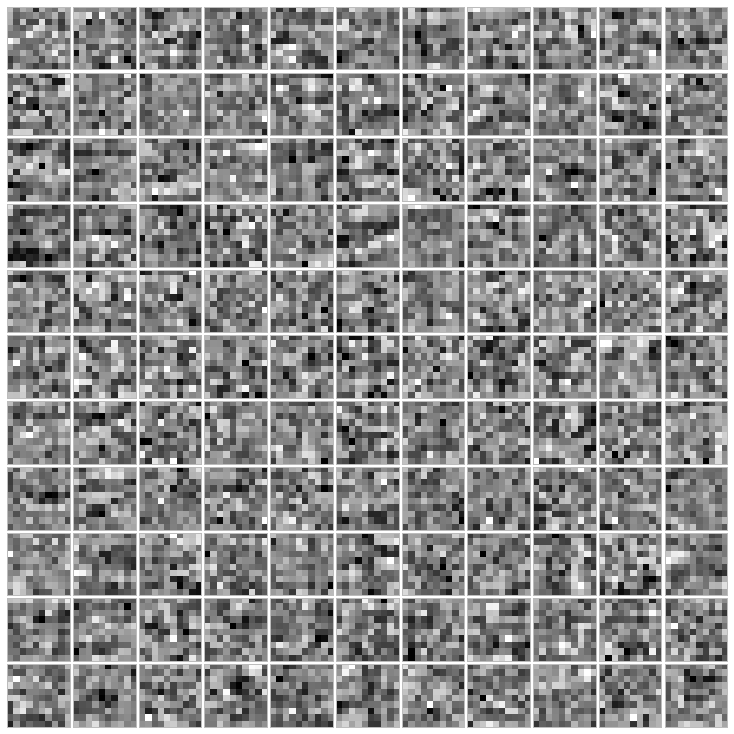

In [65]:
dico = shl.learn_dico()
_ = shl.show_dico(dico)
patches = shl.code(data, dico)

In [66]:
print('number of patches, size of patches = ', patches.shape)
print('average of patches = ', patches.mean())
print('average energy of patches = ', patches.std(axis=0).mean())
print('std of the average of individual patches = ', patches.mean(axis=0).std())

number of patches, size of patches =  (10000, 100)
average of patches =  -0.000495838225753
average energy of patches =  0.778292294952
std of the average of individual patches =  0.00295417052172


In [67]:
code = dico.transform(data)
print('number of patches, size of patches = ', code.shape)
print('average of patches = ', code.mean())
print('average energy of patches = ', code.std(axis=0).mean())
print('std of the average of individual patches = ', code.mean(axis=0).std())

number of patches, size of patches =  (10000, 121)
average of patches =  -0.00030038447814
average energy of patches =  0.705294148576
std of the average of individual patches =  0.00498128396755


In [68]:
V = dico.components_
print(code[0,:])
patches = np.dot(code, V)
print(data[0,:], patches[0,:])

[ 0.      0.      0.      0.      0.     -5.5595  0.      0.      0.
 -5.3419 -1.5422  0.      0.      0.      0.      0.      0.      0.
 -2.6976  0.      0.      0.      0.      3.1933  5.2157  0.      0.
 -5.8065  0.      0.      0.      0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.
  3.1501  0.      0.      0.      0.     -3.4526  0.      0.      0.      0.
  0.      0.     -3.6091  0.      0.      0.      0.     -2.6867  0.      0.
  0.      0.      0.      0.      3.5596 -4.2691  0.      0.      0.      0.
  0.      0.      0.      5.6103  0.      0.      0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      4.5292  0.      0.
  0.      0.     -4.0043  0.      0.      0.      0.      0.      4.489   0.
 -3.2844  0.      0.      0.      0.     -4.9598  0.      0.     -4.08    0.
  0.      0.      0.      0.      0.    ]
[ 0.7107  0.8799  0.5338  0.5097  0.8405 -1.1668  2.7355  4.1022 -

In [69]:
error = data - patches
print('number of patches, size of patches = ', error.shape)
print('average of patches = ', error.mean())
print('average energy of patches = ', error.std(axis=0).mean())
print('std of the average of individual patches = ', error.mean(axis=0).std())

number of patches, size of patches =  (10000, 100)
average of patches =  0.000495838225753
average energy of patches =  0.509718245636
std of the average of individual patches =  0.00295417052172


## Version used

In [70]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy

Installed version_information.py. To use it, type:
  %load_ext version_information


Software versions
Python 3.5.0 64bit [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
IPython 4.0.0
OS Darwin 15.0.0 x86_64 i386 64bit
numpy 1.10.1
Mon Oct 19 15:10:56 2015 CEST